In [6]:
import pyspark
import os
import matplotlib.pyplot as plt

In [2]:
myConf = pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
.builder\
.master('local')\
.appName('myApp')\
.config(conf = myConf)\
.getOrCreate()

21/10/03 20:21:51 WARN Utils: Your hostname, Kritiasui-MacBookAir.local resolves to a loopback address: 127.0.0.1; using 172.30.113.104 instead (on interface en0)
21/10/03 20:21:51 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/10/03 20:21:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
stopwords = set(['및', '이를', '등', '이', '이런', '그와', '또는', '두', '이와'])

bd_rdd = spark.sparkContext\
.textFile(os.path.join('data', 'ds_bigdata_wiki.txt'))

res = bd_rdd\
.flatMap(lambda x: x.split())\
.filter(lambda x: x.lower() not in stopwords)\
.map(lambda x: (x, 1))\
.reduceByKey(lambda x, y: x + y)\
.map(lambda x: (x[1], x[0]))\
.sortByKey(False)\
.take(15)

In [7]:
k = list()
v = list()
for i in res:
    v.append(i[0])
    k.append(i[1])

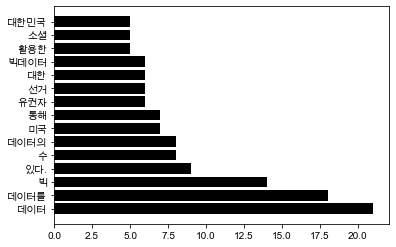

In [15]:
plt.rc('font', family='Arial Unicode MS')
plt.barh(range(len(v)), v, color = 'black')
plt.yticks(range(len(v)), k)
plt.show()

In [13]:
from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    print(font.name)

DejaVu Serif
DejaVu Sans
DejaVu Sans Mono
DejaVu Sans Mono
STIXNonUnicode
STIXSizeOneSym
DejaVu Serif
STIXSizeThreeSym
cmsy10
DejaVu Sans
STIXGeneral
cmtt10
DejaVu Sans
STIXSizeFiveSym
cmex10
DejaVu Serif
STIXSizeThreeSym
cmb10
STIXGeneral
STIXSizeFourSym
STIXSizeOneSym
DejaVu Serif
STIXGeneral
STIXNonUnicode
cmmi10
STIXSizeTwoSym
cmr10
DejaVu Sans Mono
STIXNonUnicode
STIXSizeTwoSym
cmss10
STIXGeneral
STIXSizeFourSym
DejaVu Sans
STIXNonUnicode
DejaVu Sans Mono
DejaVu Serif Display
DejaVu Sans Display
AppleGothic
Noto Sans Mongolian
Bodoni 72
Plantagenet Cherokee
Farah
Noto Sans Khudawadi
Noto Sans Marchen
Noto Serif Ahom
Arial Hebrew
Rockwell
PT Mono
Times New Roman
Noto Sans Buhid
Noto Sans Takri
Noto Sans Kharoshthi
DecoType Naskh
Oriya MN
Apple Braille
Bradley Hand
Verdana
Oriya Sangam MN
Hiragino Sans
Gurmukhi Sangam MN
Noto Sans Old South Arabian
Avenir Next
Noto Sans Carian
Myanmar MN
Georgia
Noto Sans Sharada
Trebuchet MS
Noto Sans Imperial Aramaic
STIXIntegralsUpSm
Sana
Hiragin